<a href="https://colab.research.google.com/github/yohanesnuwara/carbon-capture-and-storage/blob/master/main/HowToCalculateCO2Properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

!pip install -q coolprop
from CoolProp.CoolProp import PropsSI

plt.style.use("classic")

     |████████████████████████████████| 4.2MB 6.2MB/s 


EOS of CO2 in CoolProp is based on Span and Wagner (1996)

In [5]:
# Input
P = 3420 # psi
T = 120 # Celsius
P = P * 6895 # convert psi to Pa
T = T + 273.15 # convert C to K

rho = PropsSI('D', 'T', T, 'P', P, 'CO2') / 1000
print(rho)

0.4784861108111263


Make graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cu

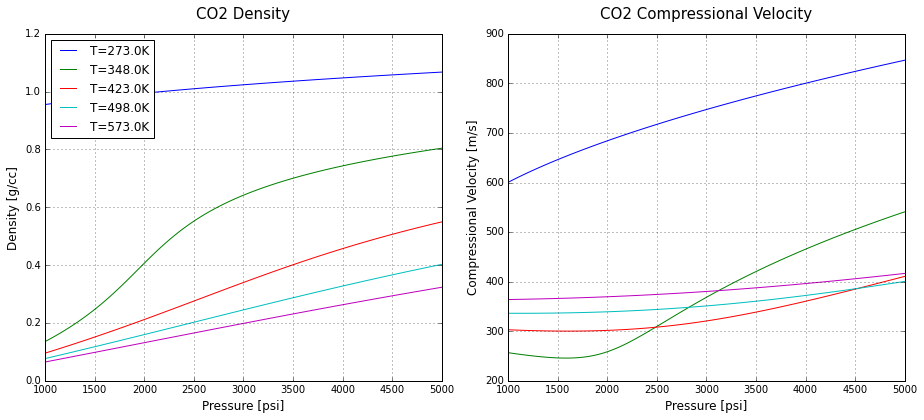

In [4]:
T = np.linspace(273, 573, 5) # Temperatures, K
P_psi = np.linspace(1000, 5000, 100) # Pressures, psi
P = P_psi * 6895 # to Pa

plt.figure(figsize=(13,6))
for i in range(len(T)):
  rho = PropsSI('D', 'T', T[i], 'P', P, 'CO2') / 1000  # D: request density in kg/m3, convert to g/cc
  vp = PropsSI('A', 'T', T[i], 'P', P, 'CO2')  # A: speed of sound in m/s
  K = (rho * vp**2) / 1E+06
  
  plt.subplot(1,2,1)
  plt.plot(P_psi, rho, label="T={}K".format(T[i]))
  plt.grid()
  plt.xlim(min(P_psi), max(P_psi))
  plt.xlabel("Pressure [psi]",size=12); plt.ylabel("Density [g/cc]",size=12)
  plt.title("CO2 Density",size=15,pad=15)
  plt.legend(loc="upper left")

  plt.subplot(1,2,2)
  plt.plot(P_psi, vp, label="T={}K".format(T[i]))
  plt.grid()
  plt.xlim(min(P_psi), max(P_psi))
  plt.xlabel("Pressure [psi]",size=12); plt.ylabel("Compressional Velocity [m/s]",size=12)
  plt.title("CO2 Compressional Velocity",size=15,pad=15)
  # plt.legend()

plt.tight_layout(1.3)
plt.show()